In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import os
import random
from tqdm import tqdm
from skimage.feature import hog

In [2]:
from utils import *

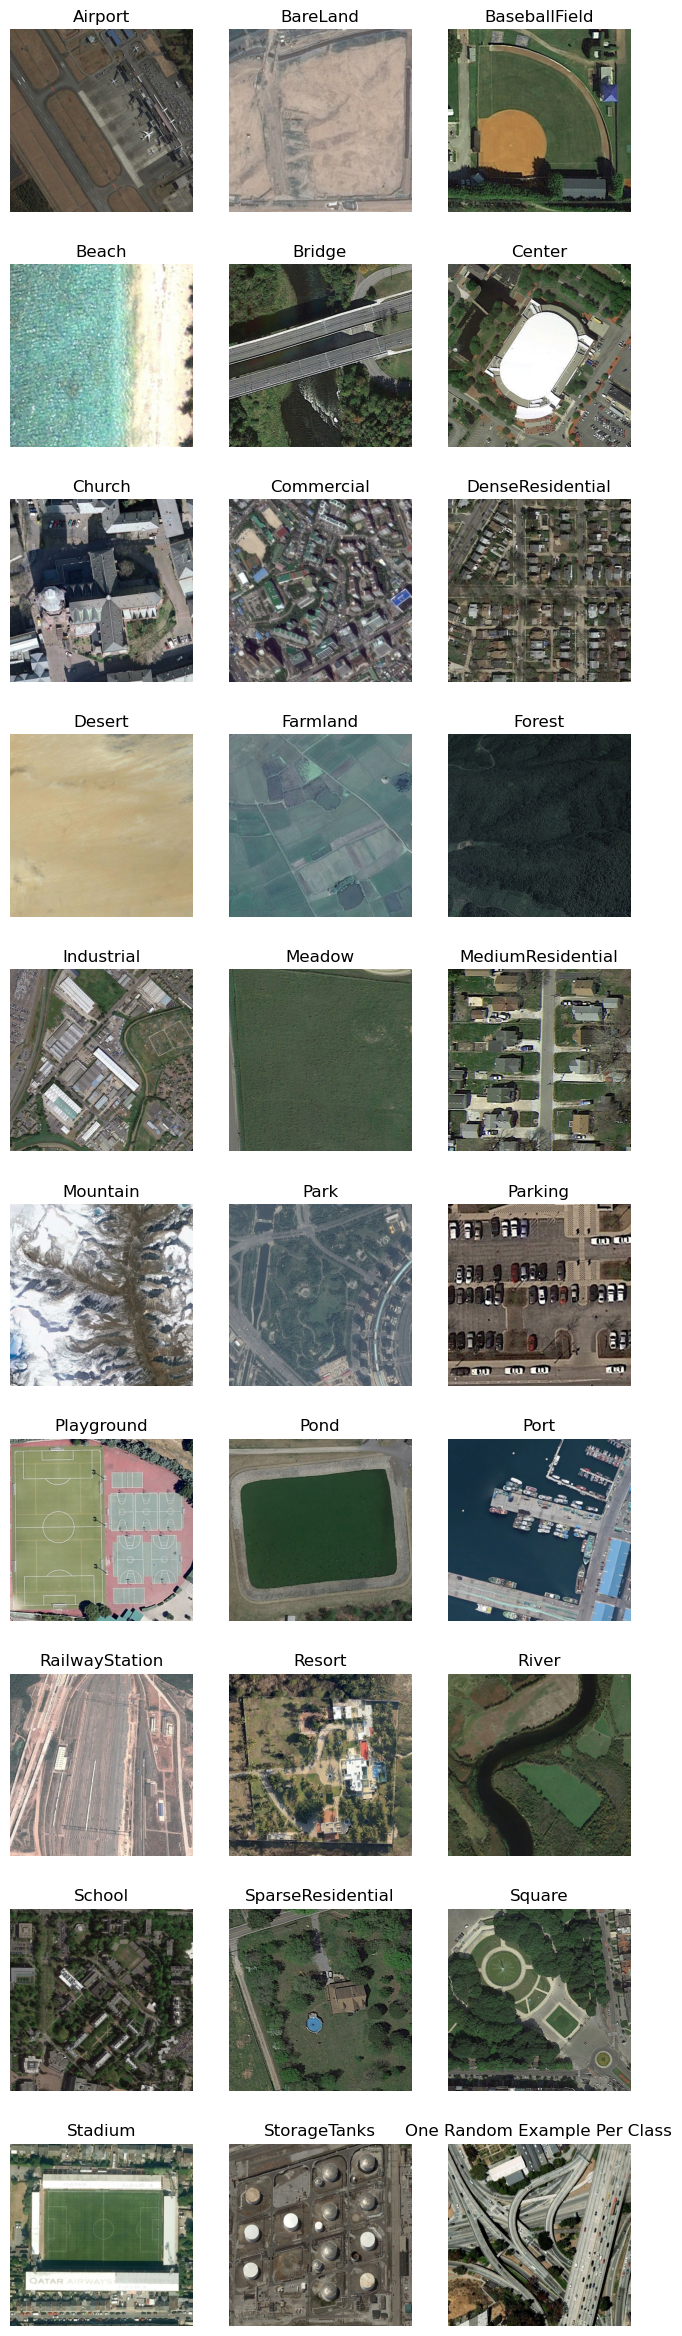

In [3]:
get_random_pics_by_class('data')

In [4]:
data = load_dataset('data', limit_to=25)

Airport


  7%|▋         | 26/360 [00:00<00:02, 156.16it/s]


BareLand


  8%|▊         | 26/310 [00:00<00:01, 213.49it/s]


BaseballField


 12%|█▏        | 26/220 [00:00<00:01, 153.58it/s]


Beach


  6%|▋         | 26/400 [00:00<00:01, 248.01it/s]


Bridge


  7%|▋         | 26/360 [00:00<00:01, 224.00it/s]


Center


 10%|█         | 26/260 [00:00<00:01, 172.80it/s]


Church


 11%|█         | 26/240 [00:00<00:00, 252.32it/s]


Commercial


  7%|▋         | 26/350 [00:00<00:01, 231.09it/s]


DenseResidential


  6%|▋         | 26/410 [00:00<00:02, 139.38it/s]


Desert


  9%|▊         | 26/300 [00:00<00:00, 286.78it/s]


Farmland


  7%|▋         | 26/370 [00:00<00:01, 278.39it/s]


Forest


 10%|█         | 26/250 [00:00<00:00, 244.25it/s]


Industrial


  7%|▋         | 26/390 [00:00<00:01, 218.94it/s]


Meadow


  9%|▉         | 26/280 [00:00<00:01, 229.78it/s]


MediumResidential


  9%|▉         | 26/290 [00:00<00:01, 155.18it/s]


Mountain


  8%|▊         | 26/340 [00:00<00:01, 173.09it/s]


Park


  7%|▋         | 26/350 [00:00<00:01, 180.92it/s]


Parking


  7%|▋         | 26/390 [00:00<00:02, 157.76it/s]


Playground


  7%|▋         | 26/370 [00:00<00:01, 218.63it/s]


Pond


  6%|▌         | 26/420 [00:00<00:01, 234.80it/s]


Port


  7%|▋         | 26/380 [00:00<00:01, 241.39it/s]


RailwayStation


 10%|█         | 26/260 [00:00<00:01, 167.28it/s]


Resort


  9%|▉         | 26/290 [00:00<00:01, 251.67it/s]


River


  6%|▋         | 26/410 [00:00<00:01, 213.12it/s]


School


  9%|▊         | 26/300 [00:00<00:01, 225.23it/s]


SparseResidential


  9%|▊         | 26/300 [00:00<00:02, 121.18it/s]


Square


  8%|▊         | 26/330 [00:00<00:01, 166.14it/s]


Stadium


  9%|▉         | 26/290 [00:00<00:01, 151.96it/s]


StorageTanks


  7%|▋         | 26/360 [00:00<00:01, 168.95it/s]


Viaduct


  6%|▌         | 26/420 [00:00<00:01, 203.10it/s]


In [14]:
data['Airport'][0].shape

(600, 600, 3)

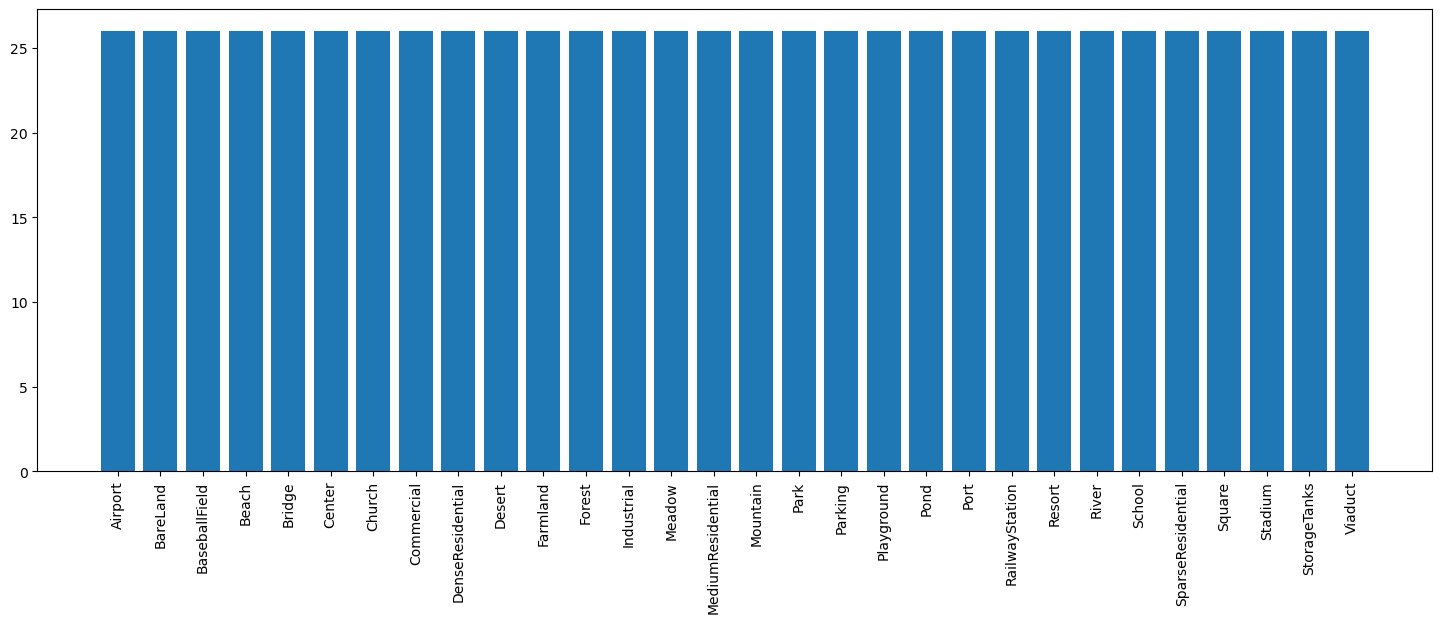

In [5]:
plot_distribution_of_images_per_class(data)

In [6]:
# rgb features
rgb_features = get_rgb_features(data=data)

In [9]:
rgb_features_3d = pd.DataFrame()
for cl in data.keys():
    tmp = pd.DataFrame(
        np.array([x.mean(axis=(0, 1)) for x in data[cl]]), columns=["R", "G", "B"]
    )
    tmp["class"] = cl
    rgb_features_3d = pd.concat([rgb_features_3d, tmp], axis=0)

In [10]:
rgb_features_3d

,R,G,B,class
0,170.595203,164.628572,165.114078,Airport
1,187.055636,176.852242,166.597781,Airport
2,120.635361,118.805983,106.345722,Airport
3,127.796603,126.065400,115.008922,Airport
4,118.224367,117.328283,105.183575,Airport
...,...,...,...,...
21,120.893761,125.956331,117.820278,Viaduct
22,123.831639,119.225847,102.027931,Viaduct
23,104.008169,105.625842,101.542556,Viaduct
24,138.704825,135.369033,116.168042,Viaduct


In [8]:
rgb_features['Airport']

,RGB,Average Value
0,R,170.595203
1,R,187.055636
2,R,120.635361
3,R,127.796603
4,R,118.224367
...,...,...
73,B,135.731750
74,B,117.296186
75,B,110.510656
76,B,122.908733


In [8]:
# num_classes = len(rgb_tmp.keys())
# fig, axes = plt.subplots(nrows=num_classes//3, ncols=3, figsize=(18,num_classes*2))
# for i, cl in enumerate(rgb_tmp.keys()):
#     sns.histplot(x='Average Value', hue='RGB', multiple='layer', data=rgb_tmp[cl], ax=axes[i//3,i%3])
#     axes[i//3,i%3].set_title(cl)
# fig.savefig('plots/class_rgb_hist.png')
# plt.show()

In [9]:
# rgb_tmp_3d = pd.DataFrame()
# for cl in data.keys():
#     tmp = pd.DataFrame(np.array([x.mean(axis=(0,1)) for x in data[cl]]), columns=['R','G','B'])
#     tmp['class'] = cl
#     rgb_tmp_3d = pd.concat([rgb_tmp_3d, tmp], axis=0)

# rgb_tmp_3d.info()

In [10]:
# fig = px.scatter_3d(rgb_tmp_3d, x='R', y='G', z='B', color='class', width=800, height=800)
# fig.update_traces(marker_size = 6)
# fig.write_html('plots/class_scatter.html')
# fig.show()

In [11]:
hog_dict = get_hog_features(data)

In [12]:
# stack the feature so that each row is an images feature vector
# get a labels vector (one label per row)

In [17]:
feature_data_list = []
labels_list = []
i = 0
for name, vector_list in hog_dict.items():
    for vector in vector_list:
        feature_data_list.append(vector)
        labels_list.append(i)
    i += 1

In [20]:
feature_data = np.stack(feature_data_list)
feature_data.shape

(780, 28224)

In [21]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA()
pca_out = pca.fit(feature_data)
transformed = pca.transform(feature_data)
transformed.shape

(780, 780)

In [34]:
pca_out.explained_variance_ratio_.shape

(780,)

In [41]:
labels = []
for i in range(4):
    labels.append("{} {:.4f}".format(i, pca_out.explained_variance_ratio_[i]))
labels

['0 0.0306', '1 0.0254', '2 0.0171', '3 0.0136']

In [65]:
list(data.keys())

['Airport',
 'BareLand',
 'BaseballField',
 'Beach',
 'Bridge',
 'Center',
 'Church',
 'Commercial',
 'DenseResidential',
 'Desert',
 'Farmland',
 'Forest',
 'Industrial',
 'Meadow',
 'MediumResidential',
 'Mountain',
 'Park',
 'Parking',
 'Playground',
 'Pond',
 'Port',
 'RailwayStation',
 'Resort',
 'River',
 'School',
 'SparseResidential',
 'Square',
 'Stadium',
 'StorageTanks',
 'Viaduct']

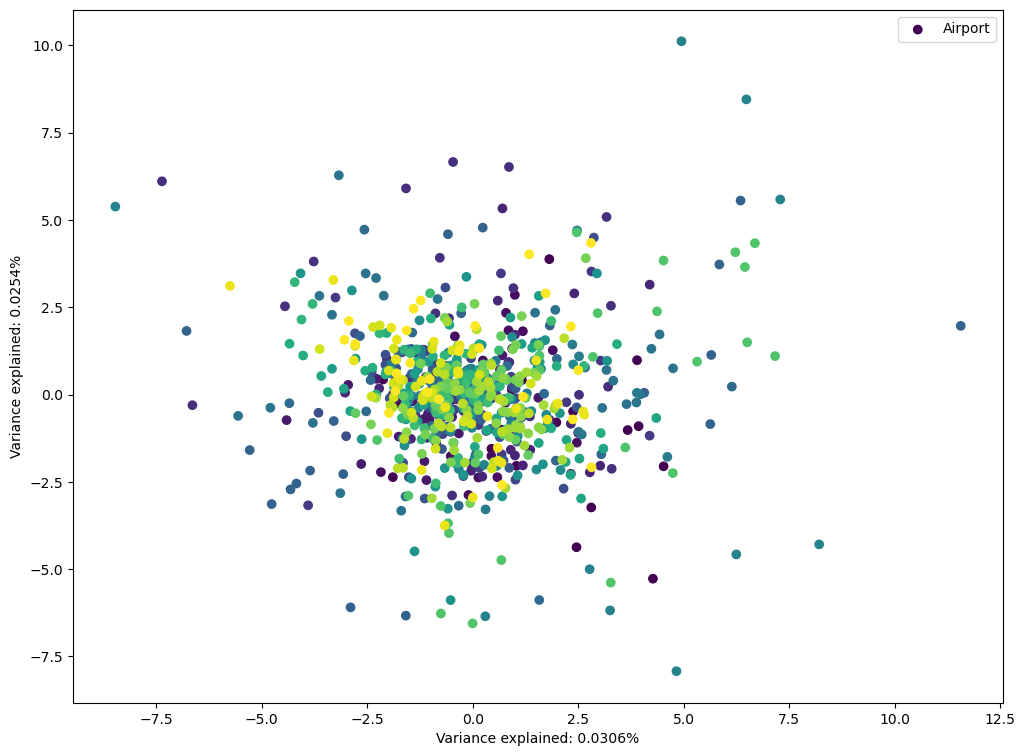

In [66]:
fig = plt.figure(figsize=(12,9))
plt.scatter(transformed[:,0], transformed[:,1], c=labels_list)
plt.xlabel(f"Variance explained: {pca_out.explained_variance_ratio_[0]:.4f}%")
plt.ylabel(f"Variance explained: {pca_out.explained_variance_ratio_[1]:.4f}%")
plt.legend(list(data.keys()))
plt.show()

In [44]:
fig = px.scatter_matrix(
    transformed,
    labels=labels,
    dimensions=range(4),
    color=labels_list
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [58]:
def plot_PCA_variance(pca_out):
    """ """
    # calculate cumulative sum of explained variances
    tot = sum(pca_out.explained_variance_ratio_)
    var_exp = [
        (i / tot) for i in sorted(pca_out.explained_variance_ratio_, reverse=True)
    ]
    cum_var_exp = np.cumsum(var_exp)

    # plot explained variances
    figure, axes = plt.subplots(figsize=(15, 14), facecolor="white")
    plt.bar(
        range(780),
        var_exp,
        alpha=0.5,
        align="center",
        label="individual explained variance",
    )
    plt.step(
        range(780), cum_var_exp, where="mid", label="cumulative explained variance"
    )
    axes.set_ylabel("Explained variance ratio", fontsize=16)
    axes.set_xlabel("Principal component index", fontsize=16)
    leg = axes.legend(prop={"size": 16})
    plt.show()

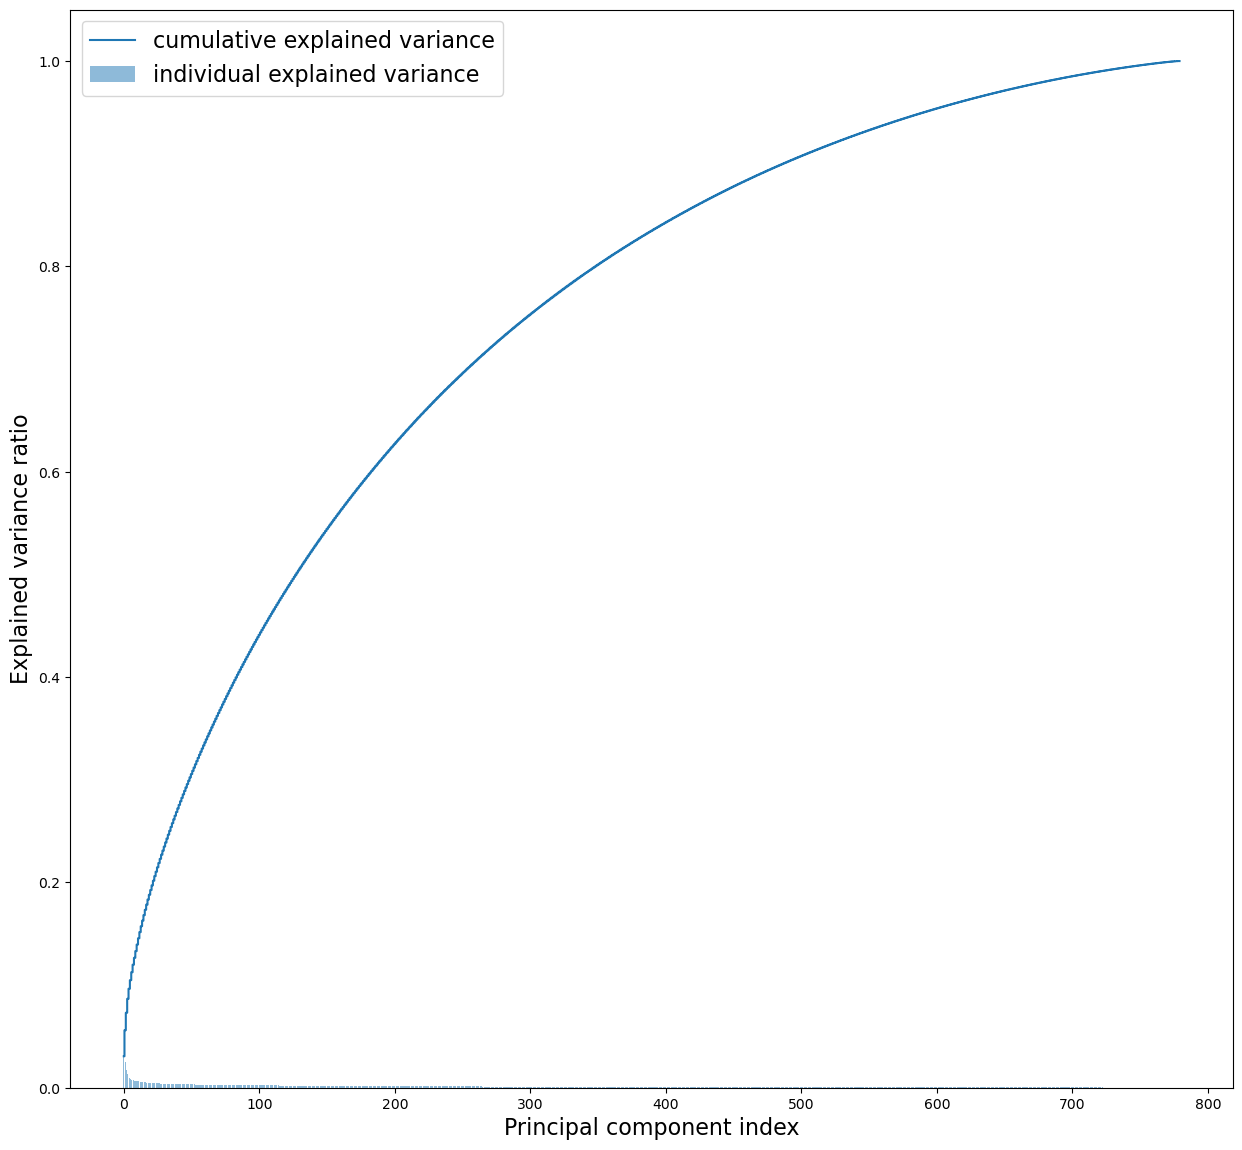

In [59]:
plot_PCA_variance(pca_out)